In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('cardekho_imputated.csv')

In [35]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [36]:
df.shape

(15411, 14)

In [37]:
df = df.drop('Unnamed: 0', axis = 1)

In [38]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [39]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [40]:
df = df.drop(['car_name', 'brand'], axis = 1)

In [41]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


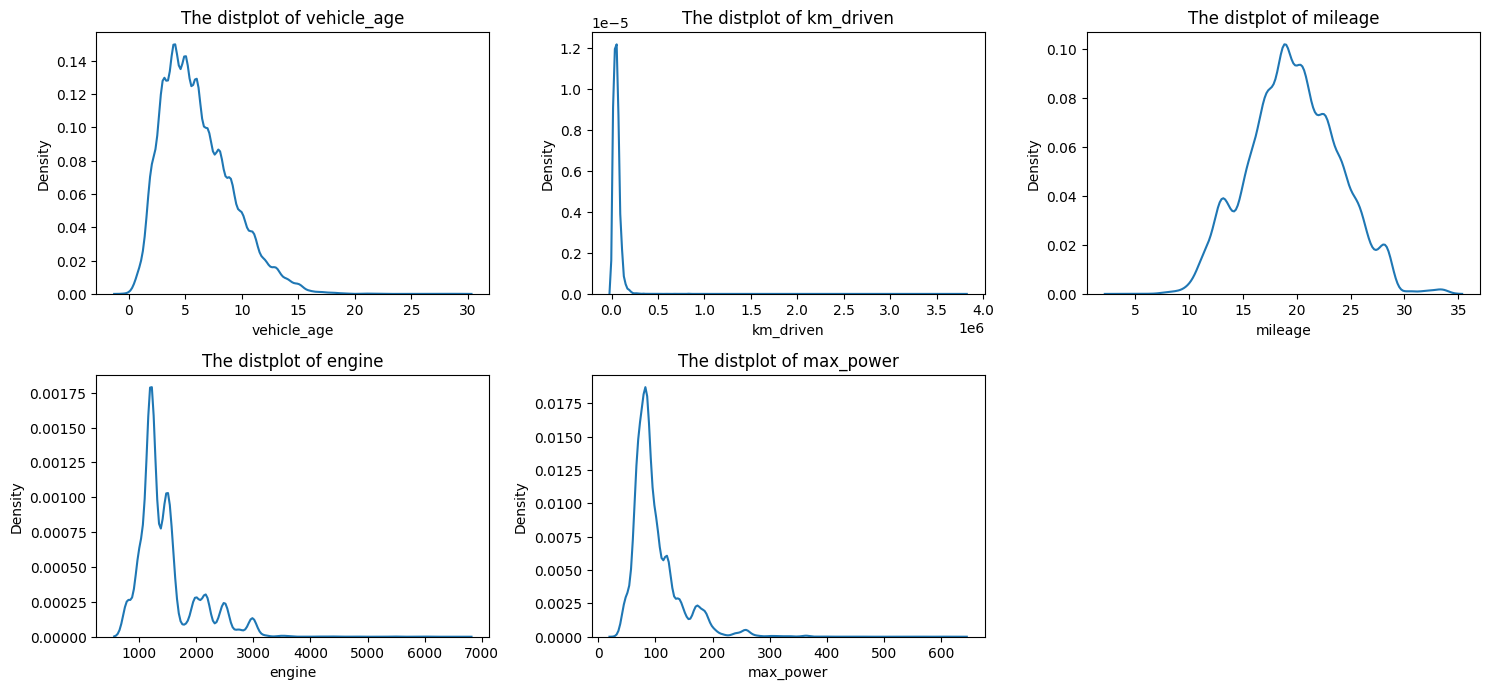

In [73]:
plt.figure(figsize=(15,10))
for i,column in enumerate(['vehicle_age','km_driven', 'mileage','engine', 'max_power']):
    plt.subplot(3,3 ,i+1)
    sns.kdeplot(df[column])
    plt.title(f"The distplot of {column}")
    plt.tight_layout()

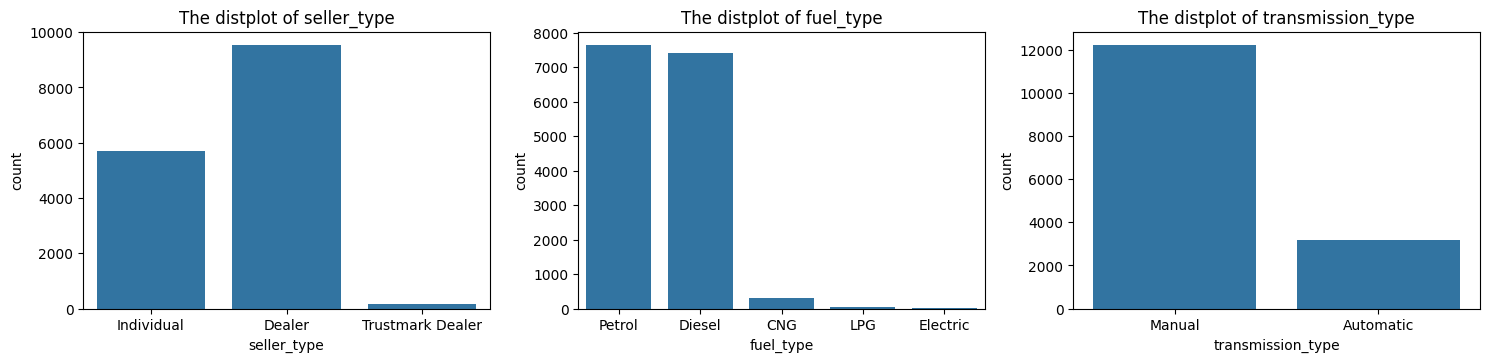

In [82]:
plt.figure(figsize=(15,10))
for i,column in enumerate(['seller_type','fuel_type', 'transmission_type']):
    plt.subplot(3,3 ,i+1)
    sns.countplot(x= df[column])
    plt.title(f"The distplot of {column}")
    plt.tight_layout()

In [42]:
num_features = [features for features in df.columns if df[features].dtype != "O" ]
cat_features = [features for features in df.columns if df[features].dtype == "O" ]


In [43]:
num_features

['vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

In [44]:
cat_features

['model', 'seller_type', 'fuel_type', 'transmission_type']

In [45]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [46]:
X = df.iloc[:, :-1]
X

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...
15406,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5
15407,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7
15408,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5
15409,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7


In [47]:
df.seller_type.value_counts()


seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64

In [48]:
Y = df.iloc[:, -1]
Y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X['model'] = encoder.fit_transform(X['model'])

In [50]:
X

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...
15406,117,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5
15407,42,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7
15408,77,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5
15409,114,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7


In [51]:
num_features = X.select_dtypes(exclude="object").columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ('trf1', OneHotEncoder(drop='first', sparse_output= False), ['seller_type','fuel_type','transmission_type']),
    ('trf2', StandardScaler(), num_features),
], remainder='passthrough')

In [52]:
X = transformer.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [54]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.024131,-0.675807,0.278659,-0.407839,0.020999,0.395884,-0.403022
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.024131,-1.007681,-0.283173,-0.551685,0.020999,0.388902,-0.403022
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.426247,-1.007681,-0.302546,-0.887326,1.329794,0.917158,2.073444
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.666211,-0.343933,2.312878,0.735736,0.022918,-0.046502,-0.403022
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.326987,-0.675807,0.472394,-0.767454,0.013323,-0.711825,2.073444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.024131,1.979183,0.278659,-0.695531,0.020999,0.405192,-0.403022
12324,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.115564,-1.007681,-0.690016,-0.503737,1.329794,1.239697,2.073444
12325,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.426247,-0.012060,2.216010,-0.887326,1.329794,0.917158,2.073444
12326,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.684908,1.315436,0.084924,-0.292763,0.976688,1.778192,-0.403022


In [55]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.536377,-0.343933,-0.864378,-0.263994,-0.554718,-0.436527,-0.403022
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.225693,-0.012060,-0.283173,-0.192071,-0.554718,-0.432571,-0.403022
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.354519,-1.007681,-0.728763,0.407288,-0.554718,-0.406973,-0.403022
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.225693,-0.012060,-0.399414,-0.192071,-0.554718,-0.432571,-0.403022
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.519714,-0.012060,-0.767510,1.018633,-0.936610,-0.780475,-0.403022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.123391,0.983562,0.278659,-0.635596,0.976688,1.941091,-0.403022
3079,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.793003,-0.675807,-0.108811,0.992261,-0.550880,-0.386028,-0.403022
3080,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.049630,-0.675807,-0.671301,1.311119,-1.318502,-1.100454,-0.403022
3081,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.536377,-0.675807,-0.244426,-0.263994,-0.554718,-0.436527,-0.403022


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import  r2_score, classification_report

In [57]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test)
print(r2_score(Y_test,Y_pred1))

0.6270351817507906


In [58]:
model2 = Ridge(alpha=0.1)
model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)
print(r2_score(Y_test,Y_pred2))

0.6270358841523951


In [59]:
model3 = Lasso(alpha=10)
model3.fit(X_train, Y_train)
Y_pred3 = model3.predict(X_test)
print(r2_score(Y_test,Y_pred3))

0.6270307869056191


In [60]:
model4 = KNeighborsRegressor(n_neighbors=20)
model4.fit(X_train, Y_train)
Y_pred4 = model4.predict(X_test)
print(r2_score(Y_test,Y_pred4))

0.7381041545903488


In [61]:
model5 = DecisionTreeRegressor()
model5.fit(X_train, Y_train)
Y_pred5 = model5.predict(X_test)
print(r2_score(Y_test,Y_pred5))

0.1099818184453143


In [62]:
model6 = RandomForestRegressor(max_samples=0.75, n_estimators=300)
model6.fit(X_train, Y_train)
Y_pred6 = model6.predict(X_test)
print(r2_score(Y_test,Y_pred6))

0.8625675181777986


In [63]:
model7 = AdaBoostRegressor(n_estimators=100, loss="linear")
model7.fit(X_train, Y_train)
Y_pred7 = model7.predict(X_test)
print(r2_score(Y_test,Y_pred7))

0.6429027249336954


In [64]:
model8 = GradientBoostingRegressor()
model8.fit(X_train, Y_train)
Y_pred8 = model8.predict(X_test)
print(r2_score(Y_test,Y_pred8))

0.8289379381275892
